# [AIFFEL_Going Deeper_2] 카메라 스티커앱 만들기 첫걸음

## 프로젝트 내용
사진 위에 고양이 수염 이미지 적용하기

## 목차
#### 1. 사진 위에 고양이 수염 이미지 적용하기
- Step 1. 필요한 라이브러리 불러오기     
- Step 2. 스티커 구하기 / 만들기     
2-1. 고양이 수염 이미지 불러오기           
2-2. 내 사진 불러오기     
- Step 3. 얼굴 검출 & 랜드마크 검출하기     
3-1. face detection      
3-2. 얼굴 랜드마크 face landmark       
- Step 4. 스티커 적용 위치 확인하기      
4-1. 좌표를 먼저 확인      
4-2. 스티커 이미지 불러오기, 스티커 이미지의 사이즈에 맞추어 resize      
4-3. 원본 이미지에 스티커 이미지 추가 위해 x, y 좌표 위치 조정      
4-4. x, y 좌표에서 음수가 나오는 경우     
- Step 5. 스티커 적용하기     
5-1. 원본 이미지에 스티커 적용     
5-2. 결과 이미지 출력     
5-3. bounding box, landmark 제거 후 최종 출력     
#### 2. 결론
#### 3. 루브릭 관련 고려한 점
#### 4. 탐구 및 시도 모음      
#### 5. 회고      
#### 6. References     

## 글씨 색 표시
### <span style = "color:orange;">- 노랑: 질문! or 짚고가자!</span>    
### <span style = "color:red;">- 빨강: 중요 or 특이사항</span>

In [ ]:
Image("[GD_1_Celeb] images/01.jpg")

## Step 1. 필요한 라이브러리 불러오기

In [3]:
import os 
import cv2 
import matplotlib.pyplot as plt 
import numpy as np 
import dlib

print("슝슝")

print(cv2.__version__)
print(dlib.__version__)

슝슝
4.5.3
19.22.1


#  <span style = "color:orange;"> What is detector?</span>질문!
cv2란?
dlib란?
환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리 


In [4]:
!pip install IPython # 주피터에 이미지를 넣기 위해 패키지 설치 
from IPython.display import Image

## Step 2. 스티커 구하기 / 만들기

## Step 2-1. 고양이 수염 이미지 불러오기

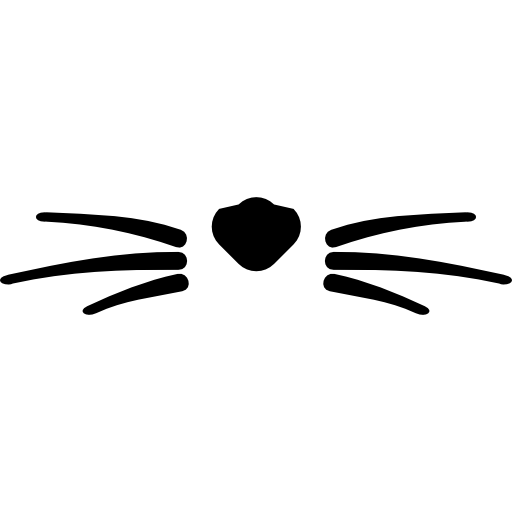

In [5]:
Image("[GD_2_Camera] images/cat-whiskers.png")

## Step 2-2. 내 사진 불러오기

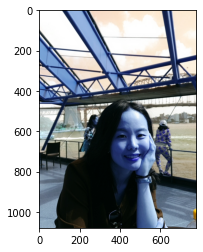

In [6]:
# 주석 출처_노드
my_image_path = os.getenv('HOME')+'/aiffel/project/first-repository/[GD_2_Camera] images/노근아_2.jpg' 
img_bgr = cv2.imread(my_image_path)    
img_show = img_bgr.copy() # 출력용 따로 보관(출처_노드)      
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려줌(실제 출력은 x, )
plt.show() # 이미지 출력(실제 출력)

### <span style = "color:orange;"> What is detector?</span>

# 욘두가 되었네... 욘두 사진 넣어놓기

이유는?

Matplotlib, dlib와 같은 이미지 라이브러리는 이미지 채널을 RGB(빨강, 녹색, 파랑) 순으로 사용
BUT OpenCV는 예외적으로 BGR(파랑, 녹색, 빨강)을 사용
-> 그래서 붉은색은 푸른색으로, 푸른색은 붉은색으로 바꾸어 출력함

**원래의 색감으로 출력하려면 cv2.cvtColor()를 사용**


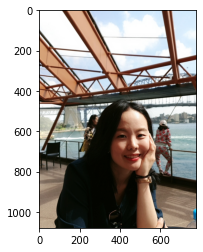

In [7]:
# plt.imshow 이전에 RGB 이미지로 바꾸기 중요!

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라 한다(출처_노드)
plt.show()

## Step 3. 얼굴 검출 & 랜드마크 검출하기
## Step 3-1. face detection
1. dlib을 활용해 hog detector를 선언
2. detector_hog를 이용해서 얼굴의 bounding box를 추출
3. 찾은 얼굴을 화면에 출력

#### 1. dlib을 활용해 hog detector를 선언

In [9]:
# dlib.get_frontal_face_detector()을 detector_hog라는 변수에 담아주기
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기 반환
print("슝슝")

슝슝


### <span style = "color:orange;"> What is detector?</span>

#### 2. detector_hog를 이용해서 얼굴의 bounding box를 추출

In [10]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) 
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("슝슝")

슝슝


### <span style = "color:red;">코드 주석</span>
1. dlib은 rgb이미지를 입력으로 받는다.    
때문에 cvtcolor()를 이용해서 opencv의 bgr이미지를 rgb로 변환, cv2.cvtColor() 사용
2. detector_hog()의 두 번째 파라미터는 이미지 피라미드의 수     
이미지 피라미드: upsampling 방법을 통해 크기를 키우는 것     
이미지 피라미드를 해서 얼굴을 검출하면 작게 촬영된 얼굴을 크게 볼 수 있어, 정확한 bounding box 검출이 가능하다.

#### 3. 찾은 얼굴을 화면에 출력

rectangles[[(340, 563) (563, 786)]]


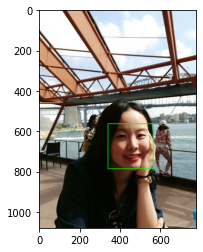

In [11]:
# 주석 출처_노드 
# 찾은 얼굴 영역 박스 리스트
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그려줌

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB) 
plt.imshow(img_show_rgb)
plt.show()

## Step 3-2. 얼굴 랜드마크 face landmark
1. 저장한 landmark 모델 불러오기
2. 얼굴 영역 박스 마다 face landmark 찾기
3. 랜드마크를 사진 위에 출력

#### 1. 저장한 landmark 모델 불러오기

In [12]:
# 주석 출처_노드
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델 불러오기
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환

print("슝슝")

슝슝


#### 2. 얼굴 영역 박스 마다 face landmark 찾기

In [13]:
list_landmarks = []
 
# 얼굴 영역 박스 마다 face landmark를 찾아 좌표 저장
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list(출처_노드)

68


### <span style = "color:red;"> 람다 함수의 사용법</span>


In [63]:
list_landmarks

[[(342, 640),
  (344, 669),
  (348, 699),
  (357, 728),
  (373, 753),
  (394, 772),
  (419, 787),
  (445, 795),
  (470, 794),
  (492, 786),
  (508, 768),
  (525, 748),
  (537, 724),
  (545, 699),
  (549, 673),
  (549, 646),
  (548, 621),
  (368, 605),
  (383, 591),
  (403, 587),
  (424, 589),
  (442, 597),
  (473, 597),
  (489, 588),
  (507, 584),
  (524, 587),
  (535, 599),
  (462, 620),
  (464, 638),
  (466, 656),
  (468, 676),
  (444, 692),
  (456, 694),
  (468, 697),
  (478, 692),
  (486, 688),
  (391, 627),
  (404, 620),
  (417, 620),
  (430, 629),
  (417, 630),
  (404, 630),
  (484, 628),
  (495, 618),
  (507, 616),
  (518, 621),
  (509, 625),
  (497, 627),
  (416, 724),
  (436, 716),
  (456, 711),
  (468, 713),
  (479, 710),
  (494, 712),
  (505, 716),
  (494, 735),
  (482, 745),
  (469, 748),
  (456, 748),
  (437, 741),
  (422, 724),
  (456, 721),
  (468, 721),
  (480, 719),
  (500, 718),
  (480, 732),
  (468, 735),
  (456, 735)]]

### <span style = "color:red;">list_landmarks</span>
내 사진의 얼굴 영역 박스 마다 찾은 face landmark들의 좌표들이 저장되어 있음    
총 68개(68개의 랜드마크들을 찾아주는 모델이라서)

#### 3. 랜드마크를 사진 위에 출력

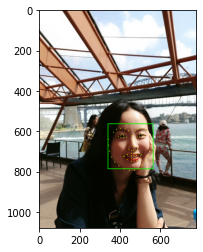

In [14]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)(출처_노드)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## Step 4. 스티커 적용 위치 확인하기
고양이 수염이 적용될 위치를 landmark를 사용해서 계산하기

## Step 4-1. 좌표를 먼저 확인

In [16]:
# 주석 출처_노드
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): 
    print (landmark[30]) # 코의 index = 30
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] - dlib_rect.height()//2 
    # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (437, 182-(186+1//2))
    w = h = dlib_rect.width() 
    # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1
    # (픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(468, 676)
(x,y) : (468,564)
(w,h) : (224,224)


### <span style = "color:red;">코드 주석</span>
dlib_rects와 list_landmarks 데이터를 zip()함수를 통해 묶어줌    
dlib_rects는 위에서 dlib_rects = detector_hog(img_rgb, 1)이렇게 정의해줌, 얼굴영역의 값

## Step 4-2. 스티커 이미지 불러오기, 스티커 이미지의 사이즈에 맞추어 resize

In [17]:
sticker_path = os.getenv('HOME')+'/aiffel/project/first-repository/[GD_2_Camera] images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) 
img_sticker = cv2.resize(img_sticker, (w,h)) 
print (img_sticker.shape) 

(224, 224, 3)


In [18]:
print(img_sticker)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


## Step 4-3. 원본 이미지에 스티커 이미지 추가 위해 x, y 좌표 위치 조정
이미지 시작점은 top-left 좌표이기 때문

In [19]:
refined_x = x - w // 2 
refined_y = y - h 
# refined_x, refined_y값에서 이미지가 시작

print (f'(x,y) : ({refined_x},{refined_y})') 

(x,y) : (356,340)


## Step 4-4. x, y 좌표에서 음수가 나오는 경우
음수 발생 : 이미지 범위를 벗어남을 의미    
(출처_노드)    
예: 이마 자리에 왕관을 두고 싶은건데, 이마위치 - 왕관 높이를 했더니 이미지의 범위를 초과하여 음수가 나오는 것    
opencv는 ndarray데이터를 사용, ndarray는 음수인덱스에 접근 불가, 그래서 스티커 이미지를 잘라주어야 한다

In [ ]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0

if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] 
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

In [ ]:
참고:  예시: (x,y) : (344,0)

## Step 5. 스티커 적용하기
1. np.where 를 사용해 스티커를 적용
2. 스티커 뒤로 원본 이미지가 같이 보이도록 만들어 보기, opencv 의 cv2.addWeighted() 를 참고

## Step 5-1. 원본 이미지에 스티커 적용

In [69]:
# sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지!!

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

# np.where는 조건에 해당하는 인덱스만 찾아서 값을 적용하는 방법(출처_노드)

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
print("슝슝")

슝~


## Step 5-2. 결과 이미지 출력

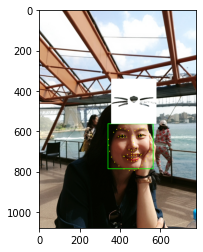

In [70]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

### <span style = "color:red;">잠깐! 이렇게 나오는 이유는?</span>
1. 스티커의 위치를 조절해야 한다. 
2. 스티커의 배경이 흰색으로 나오므로 image_sticker의 숫자를 조절해 수염만 보이게 만들어 주어야 한다.

### <span style = "color:red;">다시 조정하면</span>

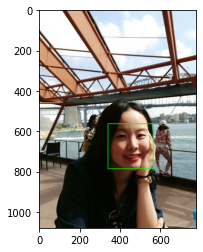

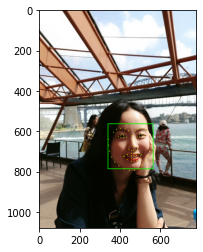

In [78]:
my_image_path = os.getenv('HOME')+'/aiffel/project/first-repository/[GD_2_Camera] images/노근아_2.jpg' 
img_bgr = cv2.imread(my_image_path)    
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)


detector_hog = dlib.get_frontal_face_detector() 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   

for dlib_rect in dlib_rects: 
    l = dlib_rect.left() 
    t = dlib_rect.top() 
    r = dlib_rect.right() 
    b = dlib_rect.bottom() 

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) 

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()



model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

        img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

plt.imshow(img_show_rgb)
plt.show()



In [79]:
# 스티커 적용

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[8]) 
    x = landmark[8][0] 
    y = landmark[8][1]  
    w = h = dlib_rect.width() 
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')
    
sticker_path = os.getenv('HOME')+'/aiffel/project/first-repository/[GD_2_Camera] images/cat-whiskers.png' 
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h)) 

refined_x = x - w // 2 
refined_y = y - h 

print (f'(x,y) : ({refined_x},{refined_y})') 

# 음수가 나오지 않았으므로 조정하지 x

(470, 794)
(x,y) : (470,794)
(w,h) : (224,224)
(x,y) : (358,570)


### <span style = "color:red;">이 아래 코드에서 img_sticker==0에서 img_sticker==255으로 바꿔줌</span>

In [80]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
print("슝슝")

슝~


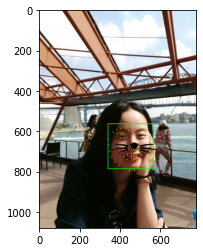

In [81]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

### <span style = "color:red;">오케이 재조정 성공!!!!!</span>

## Step 5-3. bounding box, landmark 제거 후 최종 출력
bounding box와 landmark를 제거하고 최종 결과만 출력해 봅시다. img_show 대신, 지금까지 아껴 두었던 img_bgr을 활용할 것입니다

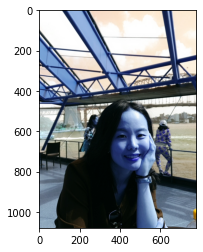

In [82]:
plt.imshow(img_bgr)
plt.show()

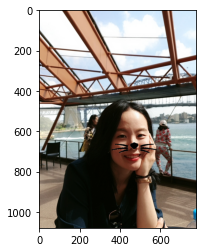

In [83]:
# 위에서 설명했으므로 생략
# 왕관 이미지
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다. 
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

### 질문! np.where란?

### 투명하게 적용 왕관의 경우....
cv2.addWeighted()
cv2.addWeighted(src1, alpha, src2, beta, gamma, dst=None, dtype=None) -> dst

# 6. 문제점 찾아보기

In [ ]:
(1) 셀프 카메라를 다양한 각도에서 촬영하면서 스티커를 반복해서 적용해 보세요.
(2) 문제점이 무엇인지 최대한 자세하게 기록해 보세요. 여러분이 생각한 문제점을 해결하기 위한 방법은 분명 존재합니다!

오늘 만든 스티커앱에서 생각해볼 수 있는 문제점은 다음과 같습니다.

얼굴 각도에 따라 스티커가 어떻게 변해야할까요?
멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?
실행 속도가 중요할까요?
스티커앱을 만들 때 정확도가 얼마나 중요할까요?

# 수지 싸이

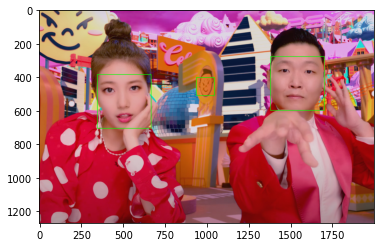

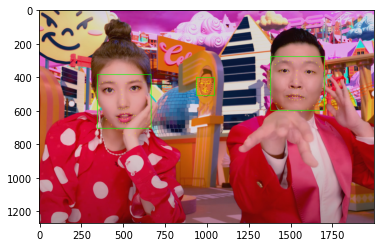

In [88]:
my_image_path = os.getenv('HOME')+'/aiffel/project/first-repository/[GD_2_Camera] images/01.jpg' # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)    
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)


detector_hog = dlib.get_frontal_face_detector() 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB) # 여기서 이 코드도 색을 블루에서 원래대로의 색으로 변환해주는 것 같다
plt.imshow(img_show_rgb)
plt.show()



model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

        img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

plt.imshow(img_show_rgb)
plt.show()


In [89]:
# 스티커 적용

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[8]) 
    x = landmark[8][0] 
    y = landmark[8][1]  
    w = h = dlib_rect.width() 
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')
    
sticker_path = os.getenv('HOME')+'/aiffel/project/first-repository/[GD_2_Camera] images/cat-whiskers.png' 
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h)) 

refined_x = x - w // 2 
refined_y = y - h 

print (f'(x,y) : ({refined_x},{refined_y})') 

# 음수가 나오지 않았으므로 조정하지 x

(1525, 609)
(x,y) : (1525,609)
(w,h) : (322,322)
(537, 745)
(x,y) : (537,745)
(w,h) : (322,322)
(992, 511)
(x,y) : (992,511)
(w,h) : (109,109)
(x,y) : (938,402)


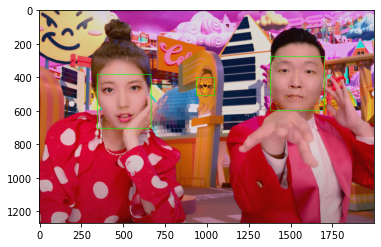

In [90]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

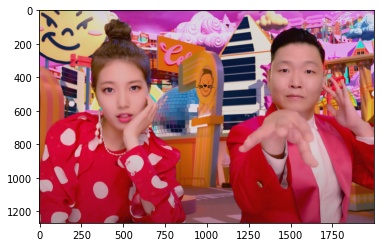

In [91]:
# 위에서 설명했으므로 생략
# 왕관 이미지
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다. 
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

### 아니 이런! 사진 중앙 싸이 캐릭터에만 붙다니....! 

## 김남주

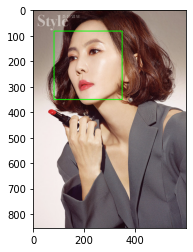

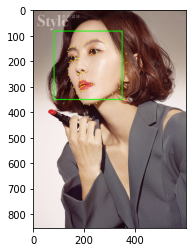

In [117]:
my_image_path = os.getenv('HOME')+'/aiffel/project/first-repository/[GD_2_Camera] images/김남주.jpeg' # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)    
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)


detector_hog = dlib.get_frontal_face_detector() 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB) # 여기서 이 코드도 색을 블루에서 원래대로의 색으로 변환해주는 것 같다
plt.imshow(img_show_rgb)
plt.show()



model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

        img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

plt.imshow(img_show_rgb)
plt.show()


In [111]:
# 스티커 적용

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[7]) 
    x = landmark[7][0] 
    y = landmark[7][1]  
    w = h = dlib_rect.width() 
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')
    
sticker_path = os.getenv('HOME')+'/aiffel/project/first-repository/[GD_2_Camera] images/cat-whiskers.png' 
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h)) 

refined_x = x - w // 2 
refined_y = y - h 

print (f'(x,y) : ({refined_x},{refined_y})') 

# 음수가 나오지 않았으므로 조정하지 x

(198, 368)
(x,y) : (198,368)
(w,h) : (268,268)
(x,y) : (64,100)


In [112]:
print(landmark)

[(141, 204), (137, 228), (138, 254), (147, 278), (159, 302), (170, 327), (182, 350), (198, 368), (220, 372), (248, 365), (280, 348), (311, 328), (338, 306), (357, 277), (365, 243), (365, 206), (365, 171), (136, 162), (139, 152), (148, 146), (159, 145), (171, 149), (198, 135), (218, 122), (241, 114), (265, 116), (286, 129), (184, 174), (180, 189), (175, 204), (169, 219), (175, 248), (180, 249), (186, 249), (194, 245), (203, 240), (148, 197), (151, 184), (162, 181), (175, 188), (164, 195), (153, 199), (223, 174), (229, 158), (245, 156), (263, 163), (249, 171), (234, 175), (182, 307), (176, 289), (180, 276), (187, 276), (193, 272), (212, 278), (236, 290), (219, 304), (206, 311), (198, 314), (192, 316), (185, 315), (187, 304), (185, 292), (191, 289), (197, 287), (228, 291), (200, 296), (194, 298), (189, 300)]


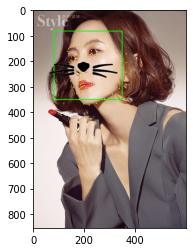

In [113]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

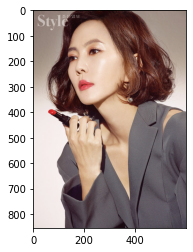

In [115]:
img_bgr_copy = img_bgr.copy()
img_blended = cv2.addWeighted(img_bgr,0.5,img_bgr_copy,0.5,0)
plt.imshow(cv2.cvtColor(img_blended, cv2.COLOR_BGR2RGB))
plt.show()

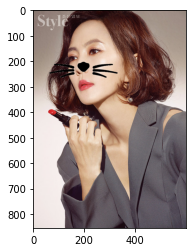

In [116]:
# 위에서 설명했으므로 생략
# 왕관 이미지
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다. 
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

# 욘두로 스티커앱

# 2. 결론

1. 나와 닮은 연예인을 얼굴 임베딩 벡터간 거리를 통해 구해보았다.      
 내 사진을 세 장 사용했는데(안경 쓰지 않은 사진 2장, 안경 쓴 사진 1장) 사진마다 닮은 연예인의 순위에 차이가 있었다.    
2. 임베딩 거리 0.5 이내에 남자 연예인도 닮았다고 나온다.
3. Pandas와 Matplotlib으로 시각화를 간단히 해 보았다.

# 3. 루브릭 관련 고려한 점
1. 자기만의 카메라앱 기능 구현을 완수하였다.
: 얼굴 영역과 랜드마크를 정확하게 검출하고, 스티커 사진을 합성시키는 데 성공하였다.

2. 스티커 이미지를 정확한 원본 위치에 반영하였다.
: 정확한 좌표계산을 통해 고양이 수염의 위치가 원본 얼굴에 잘 어울리게 출력되었다.

3. 카메라 스티커앱을 다양한 원본이미지에 적용했을 때의 문제점을 체계적으로 분석하였다.
: 얼굴각도, 이미지 밝기, 촬영거리 등 다양한 변수에 따른 영향도를 보고서에 체계적으로 분석하였다.

# 4. 탐구 및 시도 모음
어떤 시도들을 해보았나?
시도 1. 싸이, 수지 사진, 한 사진에 여러명 있을 때 사진 시도,+ 캐릭터도 인식 -> 캐릭터에도 수염이 붙나?
시도 2. 엄청 가까이에서 찍은 사진, 엄청 멀리서 찍은 사진
시도 3. 왜 이 사진은 인식을 못했을까?
시도 4. 마스크를 쓴 사진에도 바운딩 박스와 노란색 점을 표시할 수 있을까?

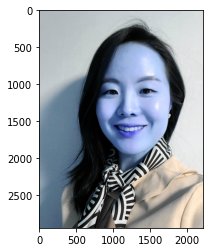

In [30]:
my_image_path = os.getenv('HOME')+'/aiffel/project/first-repository/[GD_2_Camera] images/노근아_4.jpg' # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)

# 5. 회고

### 1. 프로젝트에서 어려웠던 점, 해결을 위해 시도한 방법, 문제해결에 성공한 이유 또는 실패한 이유

- **프로젝트에서 어려웠던 점**  
    checkpoint 에러때문에 사진을 여러번 폴더를 만들어 업로드해야했던 점

- **해결을 위해 시도한 방법**  
    1. 판다스로 시각화를 해보려고 했어요.
    2. tkinter나 flask를 해보려고 알아봤어요(어려워서 해보지는 못함)

- **문제해결에 성공한 이유 또는 실패한 이유**  
    얼굴 임베딩 딕셔너리 함수에서 '산들'의 이미지가 문제였는데, 게더에서 다른 그루분들이 다같이 이야기 나누어 도움을 받을 수 있었어요.
    

 
### 2. 프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점

- **프로젝트를 진행하면서 알아낸 점**  
얼굴 영역 crop, 얼굴 임베딩 벡터로 닮음을 구할 수 있는 점    

- **아직 모호한 점**    
1. .ipynb_checkpoints
IsADirectoryError: [Errno 21] Is a directory: '/aiffel/aiffel/project/first-repository/face_embedding_images/images1/.ipynb_checkpoints'

ChatGPT에 찾아보니, 쥬피터 노트북을 사용하며 자동적으로 저장이 되는 거라고 하는데,        
사진을 지우면 저 에러로 인해 폴더를 아예 새로 만들어야 하는 경우가 많았어요. 

for entry in os.scandir(dir_path):
    if entry.is_file():
        # Process the file
        print(entry.name)
        
이런 방법도 있던데.. 새폴더를 만드는 방법말고 다른 방법도 알고 싶어요.

2. 사진을 업로드 할 때
aiffel/face_embedding/images에 업로드하려고 하니 안돼요.     
대신 aiffel/project/first-repository/face_embedding_images(새로 만듦)/images(새로 만듦)에 업로드하니 되는데.. 왜 그럴까요?




### 3. 자기 다짐, 프로젝트를 진행하면서 느낀 점

1. 작지만 시각화를 스스로 여러가지 해 본 것이 뿌듯해요.
2. 재미있는 프로젝트였어요, 얼굴 임베딩 벡터에 대해서도 많이 배웠습니다.

# 6. References


<span style = "color:gray;">np.mean() (axis=0)</span>     
https://blog.naver.com/pmw9440/223028166828